## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
X=dataset.iloc[:, 1:-1].values
y=dataset.iloc[:, -1].values

In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
y=y.reshape(-1, 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
sy=StandardScaler()
y=sy.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [11]:
from sklearn.svm import SVR
regressor=SVR(kernel = 'rbf')
regressor.fit(X, y.reshape(-1))
y_pred=regressor.predict(X)
y_pred

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [12]:
from sklearn.metrics import r2_score
print("Score:", r2_score(y, y_pred))

Score: 0.7516001070620798


In [13]:
y_pred=sy.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)

In [14]:
y_pred

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

In [15]:
sy.inverse_transform(regressor.predict(ss.transform([[6.5]])))

array([170370.0204065])

## Visualization

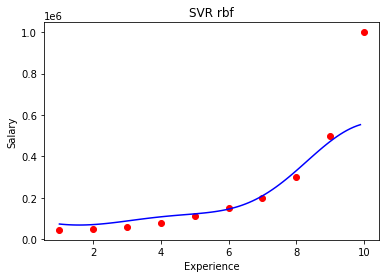

In [16]:
X_grid=np.arange(min(ss.inverse_transform(X)), max(ss.inverse_transform(X)), 0.1).reshape(-1, 1)
plt.scatter(ss.inverse_transform(X), sy.inverse_transform(y), color="red")
plt.plot(X_grid, (sy.inverse_transform(regressor.predict(ss.transform(X_grid)))).reshape(-1), color="blue")
plt.title("SVR rbf")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

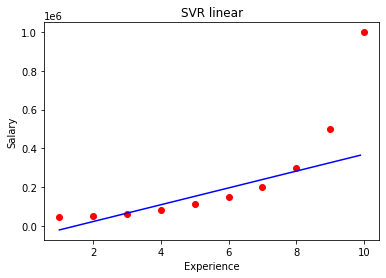

In [17]:
regressor_linear=SVR(kernel="linear")
regressor_linear.fit(X, y.reshape(-1))
X_grid=np.arange(min(ss.inverse_transform(X)), max(ss.inverse_transform(X)), 0.1).reshape(-1, 1)
plt.scatter(ss.inverse_transform(X), sy.inverse_transform(y), color="red")
plt.plot(X_grid, (sy.inverse_transform(regressor_linear.predict(ss.transform(X_grid)))).reshape(-1), color="blue")
plt.title("SVR linear")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

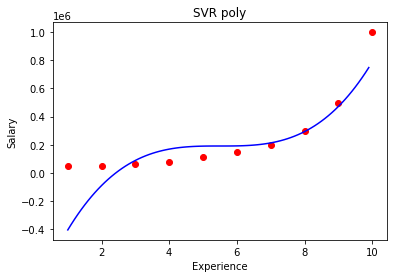

In [18]:
regressor_poly=SVR(kernel="poly")
regressor_poly.fit(X, y.reshape(-1))
X_grid=np.arange(min(ss.inverse_transform(X)), max(ss.inverse_transform(X)), 0.1).reshape(-1, 1)
plt.scatter(ss.inverse_transform(X), sy.inverse_transform(y), color="red")
plt.plot(X_grid, (sy.inverse_transform(regressor_poly.predict(ss.transform(X_grid)))).reshape(-1), color="blue")
plt.title("SVR poly")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()